<a href="https://colab.research.google.com/github/vitorbeltrao/-Statistic/blob/main/An%C3%A1lise_descritiva_com_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Vitor Beltrão](https://www.linkedin.com/in/v%C3%ADtor-beltr%C3%A3o-56a912178/)*

***
# <font color=green>ESTATÍSTICA DESCRITIVA</font>
***
**Emprega métodos numéricos e gráficos para investigar padrões em um conjunto de dados, resumir as informações reveladas e apresenta-las de uma forma apropriada.**
***
**Por que saber métodos de análise descritiva?**

► Porque apenas "correr" o olho sobre a planilha de dados é impraticável.

► Porque abordagens subjetivas não são escaláveis.

► Para dispor de formas apropriadas de síntese.

► Para não fazer julgamentos ocasionados por problemas nos dados.

► Para interpretar corretamente a informação contida nos dados.

► Para tomar decisões seguras.

► Para fazer inferência estatística de forma qualificada.
***
**Procedimentos para análise de dados:**

► O que é feito?

* Análise de dados históricos.
* O que aconteceu/está acontecendo?
* Explorar e descrever os dados brutos.
* Ter impressões preliminares.

► Qual a utilidade?

* Recursos para a comunicação: Storytelling.
* Auxilia do pré-processamento e curadoria dos dados.
* Determinante para o processo de inferência estatística.
***
**Aspectos da qualidade dos dados:**

► Validade: grau de conformidade com o mundo real.

* Fora de escala: pessoa com 180m de altura.
* Fora do conjunto: tipo sanguíneo = vermelho.
* Fora de lógica: data de alta médica antes da internação.

► Acurácia: valores próximos dos valores verdadeiros.

* Dados de sensores, avaliações sensoriais.

► Completude: a quantidade de valores preenchidos frente ao esperado.

* Valores ausentes, suas razões e implicações.

► Uniformidade: dados expressos com os mesmos padrões.

* Pressao em psi, bar ou atm?
* Data no formato dd/mm/yyyy ou yyyy-mm-dd.

► Unicidade: se não existem registros duplicados.

<font color='red'>Todos os aspectos da qualidade dos dados devem ser identificados e devidamente tratados.</font>
***
**Processo de análise de dados**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/analise%20de%20dados.png?raw=true" width="70%"></p>




# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
# Importar a biblioteca
import pandas as pd
# Transformando o dataset em um dataframe do pandas
df = pd.read_csv("https://raw.githubusercontent.com/vitorbeltrao/Datasets/main/dados.csv")

In [ ]:
# Ver as 5 primeiras entradas do dataframe
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis Qualitativas
► Expressa em rótulos.

► Variável categórica.

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas.

Exemplos: Grau de CNH; Premiação olímpica; Nível de proeficiência.

In [ ]:
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

Exemplos: Preferência musical; Estado de origem; Signo do zodíaco; Sexo; Cor.

In [ ]:
sorted(df['Sexo'].unique())

[0, 1]

In [ ]:
sorted(df['Cor'].unique())

[0, 2, 4, 6, 8]

In [ ]:
sorted(df['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

### Variáveis Quantitativas
► Expressa em números.

► Variável métrica.

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [ ]:
print('De %s até %s anos' % (df.Idade.min(), df.Idade.max()))

De 13 até 99 anos


#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (infinitos valores em um intervalo).

In [ ]:
print('De %s até %s metros' % (df.Altura.min(), df.Altura.max()))

De 1.339244614 até 2.028496765 metros


### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

#### <font color='red'>Observação</font>
***

Os tipos de variáveis são importantes para dar o tratamento estatístico mais apropriado.
Quanto a forma de apresentação, pode ser:

► Numérica
* Tabelas de frequência;
* Medidas resumo (média, mediana, variância, amplitude, etc).

► Gráfica ou visual
* Gráficos de uma variável;
* Gráficos de duas ou mais variáveis.

► Variáveis qualitativas
* Tabelas de frequência (uma variável);
* Tabelas de frequência cruzadas (mais de uma variável).

► Variáveis quantitativas
* Medidas de posição ou tendência central;
* Medidas de dispersão ou variabilidade;
* Separatrizes;
* Medidas de associação;
* Coeficientes/índices específicos.




# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***
**Algumas Definições:**
* **Classe**: Uma classe é uma das categorias nas quais uma variável qualitativa pode ser classificada.

* **Frequência da classe**: É o número de observações no conjunto de dados que pertence a uma classe particular.

* **Frequência relativa de classe**: É a frequência de classe dividida pelo número total de observações no conjunto de dados.

* **Percentual da classe**: É a frequência relativa de classe multiplicada por 100.
***
**Os gráficos que ilustram as tabelas de frequências podem ser:**
* Gráfico de barras verticais;
* Gráfico de barras horizontais;
* Gráfico de barras empilhadas;
* Gráfico de setores (pizza);
* Gráfico de rosca.
***
#### <font color='red'>Cuidados com a apresentação em tabelas e gráficos:</font>
► Variáveis Nominais:
* Não há ordenação natural das classes;
* Não há ordem para exibição das frequências das classes;
* Ordem alfabética auxilia procurar pela classe quando existem muitas;
* A ordenação pela frequência auxilia identificar as classes predominantes e minoritárias.

► Variáveis Ordinais:
* Ordenação natural das classes;
* Procurar manter a ordem das classes para uma exibição coerente;
* Quando for o caso, pode-se ordenar pela frequência.

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [ ]:
df['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
df['Sexo'].value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [ ]:
frequencia = df['Sexo'].value_counts()

In [ ]:
percentual = df['Sexo'].value_counts(normalize = True) * 100

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [ ]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'})

,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [ ]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)

In [ ]:
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [ ]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [ ]:
frequencia = pd.crosstab(df.Sexo,
                         df.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***
**Algumas Definições:**
* **Amplitude de Classe**: É o comprimento de cada classe resultante do agrupamento ou compartimentalização de variáveis quantitativas.
* **Frequência Acumulada**: É a frequência absoluta (ou relativa) acumulada conforme disposição das classes.
* **Densidade**: A densidade de uma classe é o quociente da frequência relativa da classe pela amplitude da classe. Em gráficos que exibem a densidade no eixo y, a área abaixo da curva é igual a 1.
***
**Os gráficos que ilustram as tabelas de frequências podem ser:**
* Histograma da frequência absoluta;
* Histograma com amplitude de classe variável;
* Histograma da densidade;
* Gráfico de frequências acumuladas;
* Gráfico de densidade empírica.
***
**Quando usar cada tipo de gráfico?**

► Histograma de frequência
* Para analisar a simetria da distribuição;
* Para classes de mesma amplitude.

► Histograma de densidade
* Para examinar a simetria da distribuição;
* Para classes de amplitude variável.

► Frequência acumulada
* Para examinar frequências relativas e separatrizes.

► Densidade
* Para examinar a simetria da distribuição;
* Para determinar as modas da distribuição.
***
#### <font color='red'>Alguns cuidados:</font>
► Histograma
* Escolha apropriada do número de classes no agrupamento dos dados contínuos em classes;
* Não usar gráficos de barras separadas (como feito para variáveis qualitativas);
* O histograma é um gráfico de barras mas que enfatiza a continuidade por não apresentar espaço entre as barras;
* Use densidade quando as classes são de amplitude variável.


### Exemplo
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [ ]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [ ]:
labels = ['E', 'D', 'C', 'B', 'A']

In [ ]:
frequencia = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
percentual = pd.value_counts(
    pd.cut(x = df.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [ ]:
n= df.shape[0]
n

76840

In [ ]:
k = 1 + (10 /3) * np.log10(n)  

In [ ]:
k = k.round(0)
k

17.0

In [ ]:
k = int(k.round(0))
k

17

### Passo 2 - Criar a tabela de frequências

In [ ]:
pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [ ]:
frequencia = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

In [ ]:
percentual = pd.value_counts(
    pd.cut(
        x = df.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

(-200.001, 11764.706]       0.983784
(11764.706, 23529.412]      0.013300
(23529.412, 35294.118]      0.002199
(35294.118, 47058.824]      0.000247
(47058.824, 58823.529]      0.000208
(58823.529, 70588.235]      0.000065
(70588.235, 82352.941]      0.000052
(82352.941, 94117.647]      0.000013
(94117.647, 105882.353]     0.000078
(105882.353, 117647.059]    0.000000
(117647.059, 129411.765]    0.000013
(129411.765, 141176.471]    0.000000
(141176.471, 152941.176]    0.000000
(152941.176, 164705.882]    0.000000
(164705.882, 176470.588]    0.000000
(176470.588, 188235.294]    0.000000
(188235.294, 200000.0]      0.000039
Name: Renda, dtype: float64

In [ ]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.983784
"(11764.706, 23529.412]",1022,0.013300
"(23529.412, 35294.118]",169,0.002199
"(35294.118, 47058.824]",19,0.000247
"(47058.824, 58823.529]",16,0.000208
"(58823.529, 70588.235]",5,0.000065
"(70588.235, 82352.941]",4,0.000052
"(82352.941, 94117.647]",1,0.000013
"(94117.647, 105882.353]",6,0.000078
"(105882.353, 117647.059]",0,0.000000


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

**Por ser uma forma gráfica extremamente importante e muito utilizada, vamos detalhar um pouco mais sobre os histogramas.**

### Importando a biblioteca

https://seaborn.pydata.org/

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


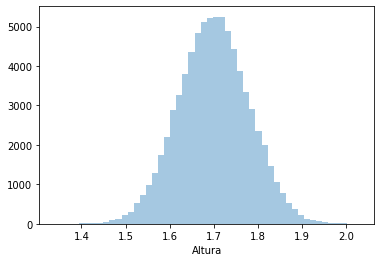

In [ ]:
ax = sns.distplot(df.Altura, kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


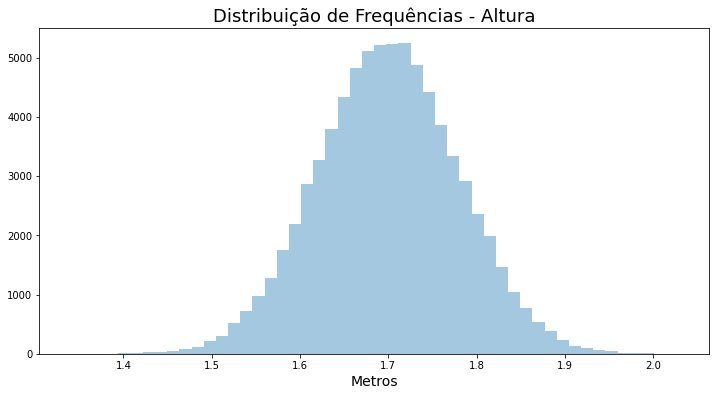

In [ ]:
ax = sns.distplot(df.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


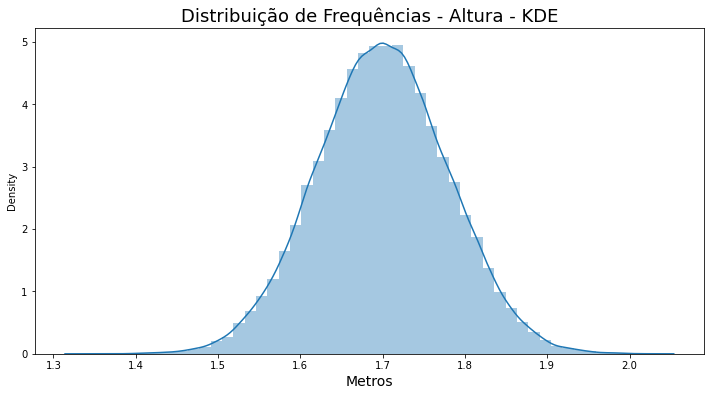

In [ ]:
ax = sns.distplot(df.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

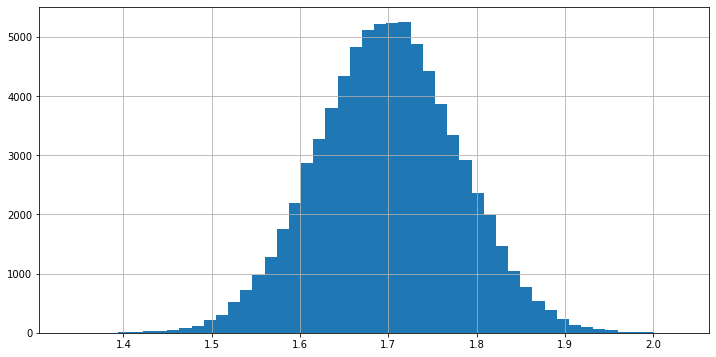

In [ ]:
df.Altura.hist(bins = 50, figsize=(12,6))

In [ ]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


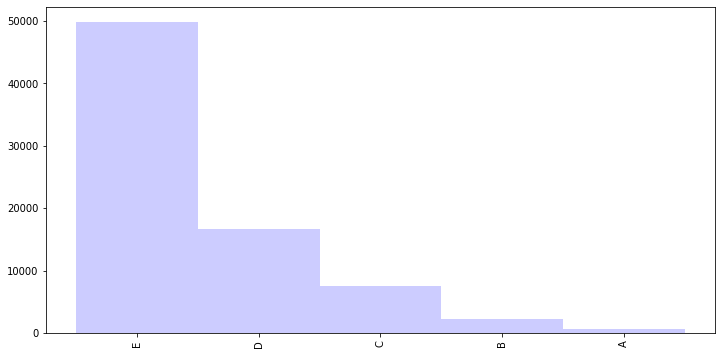

In [ ]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

# <font color=green>3 MEDIDAS DE POSIÇÃO</font>
***
Existem diversas medidas de posição como:
* Média Aritmética;
* Média Aritmética Ponderada;
* Média Geométrica;
* Média Harmônica;
* Média Aparada;
* Mediana;
* Moda;
* Separatrizes.

**Aqui iremos detalhar as mais utilizadas no dia a dia do cientista de dados que são a média aritmética, mediana, moda e separatrizes.**

## DataFrame de exemplo

In [ ]:
df_2 = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df_2.rename_axis('Matérias', axis = 'columns', inplace = True)
df_2

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## <font color=green>3.1 Média aritmética</font>
***
► A média aritmética é a soma de todos os valores dividido pela quantidade de valores.

► Tem interpretação física de centro de gravidade.

► É uma medida influenciada por valores extremos (outliers).
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [ ]:
(8 + 10 + 4 + 8 + 6 + 10 + 8) / 7

7.714285714285714

In [ ]:
df_2['Fulano'].mean()

7.714285714285714

In [ ]:
df.Renda.mean()

2000.3831988547631

In [ ]:
df.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

## <font color=green>3.2 Mediana</font>
***
► É o número que ocupa a posição intermediária quando os valores são ordenados.

► Separa o conjunto de valores em duas partes de mesmo tamanho. Assim, se todos os valores da amostra forem distintos, metade dos valores é menor e metade é maior que ela.
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

In [ ]:
notas_fulano = df_2.Fulano
notas_fulano

Matemática     8
Português     10
Inglês         4
Geografia      8
História       6
Física        10
Química        8
Name: Fulano, dtype: int64

In [ ]:
notas_fulano = notas_fulano.sort_values().reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [ ]:
n = notas_fulano.shape[0]
n

7

In [ ]:
elemento_md = (n + 1) / 2
elemento_md

4.0

In [ ]:
notas_fulano.loc[elemento_md - 1]

index     Geografia
Fulano            8
Name: 3, dtype: object

In [ ]:
notas_fulano.median()

Fulano    8.0
dtype: float64

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [ ]:
notas_beltrano = df_2.Beltrano.sample(6, random_state = 101)
notas_beltrano

Matemática    10.0
Inglês         0.5
Física         9.5
História       3.0
Química       10.0
Português      2.0
Name: Beltrano, dtype: float64

In [ ]:
notas_beltrano.median()

6.25

### Obtendo a mediana em nosso dataset

In [ ]:
df.Renda.median()

1200.0

In [ ]:
df.Renda.quantile()

1200.0

## <font color=green>3.3 Moda</font>
***
► É o valor ou classe que ocorre com maior frequência (ou densidade) na amostra.

► A moda representa o valor mais típico, ou seja, o que mais se repete.

► Para variáveis onde todos os valores são distintos, a moda fica indefinida.

► Pode-se agrupar os dados em classe e reportar a classe modal.

► Pode-se determinar a moda como sendo o valor que corresponde ao máximo da densidade empírica.

In [ ]:
df_2

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [ ]:
df_2.mode()

Matérias,Fulano,Beltrano,Sicrano
0,8,10.0,8.0


In [ ]:
exemplo = pd.Series([1, 2, 2, 3, 4, 4, 5, 6, 6])

In [ ]:
exemplo.mode()

0    2
1    4
2    6
dtype: int64

### Obtendo a moda em nosso dataset

In [ ]:
df.Renda.mode()

0    788
dtype: int64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***
**Relação a assimetria:**

► Assimetria a direita: moda < mediana < média.

► Assimetria a esquerda: média < mediana < moda.

* A moda está na região de maior densidade.
* Como a média é "puxada" pelos valores extremos, encontra-se para o lado da cauda longa.
* A mediana está entre a moda e a média.
***
**Quando usar cada medida de posição?**

► **Média:** distribuição unimodal simétrica e sem valores extremos.

► **Mediana:** distribuição assimétrica ou com presença de valores extremos.

► **Moda:** quando valores se repetem, estão agrupados em classe ou é variável qualitativa.
***
<font color='red'>As três medidas:</font>

► Perdem significado em distribuições multimodais;

► Aproximam-se em distribuições unimodais simétricas;

► Sempre faça gráficos!


<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avaliando a variável RENDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


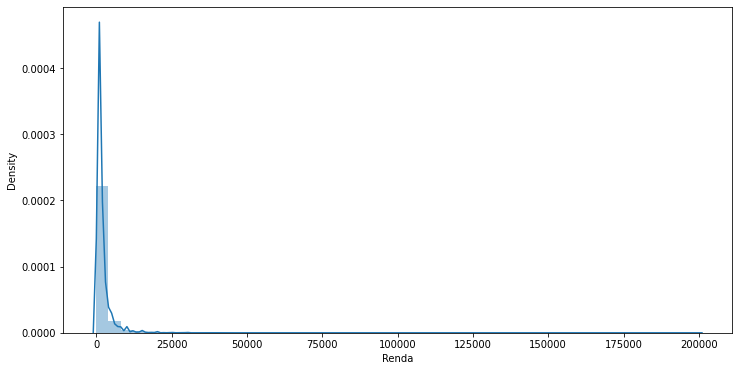

In [ ]:
ax = sns.distplot(df.Renda)
ax.figure.set_size_inches(12, 6)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


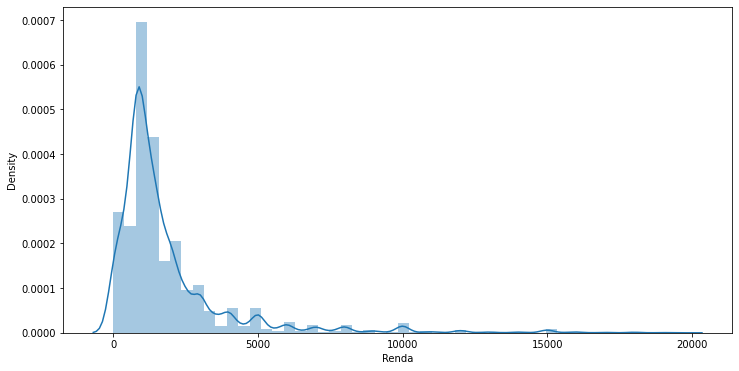

In [ ]:
ax = sns.distplot(df.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = df.Renda.mode()[0]
Moda

788

In [ ]:
Mediana = df.Renda.median()
Mediana

1200.0

In [ ]:
Media = df.Renda.mean()
Media

2000.3831988547631

***

### Avaliando a variável ALTURA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


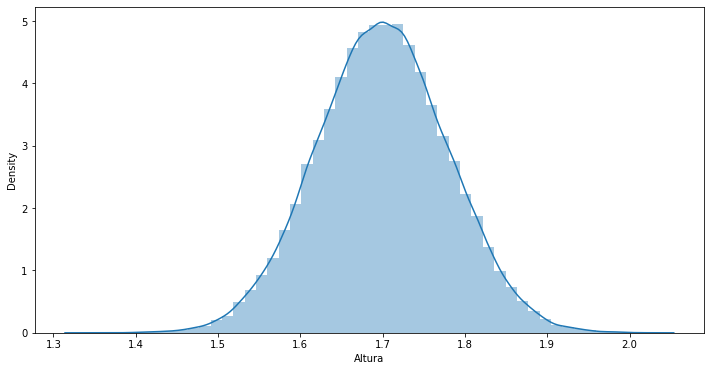

In [ ]:
ax = sns.distplot(df.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = df.Altura.mode()
Moda

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [ ]:
Mediana = df.Altura.median()
Mediana

1.6993247325

In [ ]:
Media = df.Altura.mean()
Media

1.6995124540575814

***

### Avaliando a variável ANOS DE ESTUDO

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


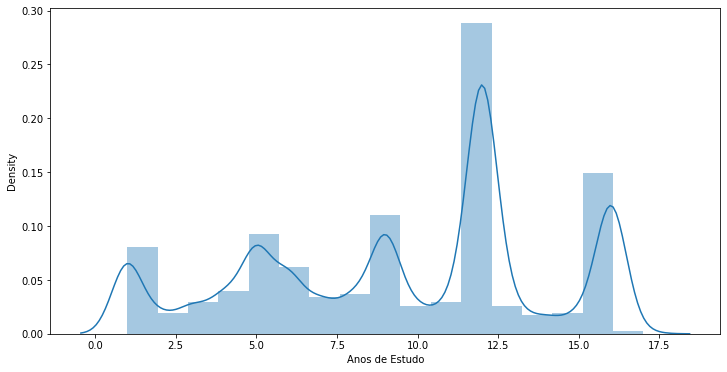

In [ ]:
ax = sns.distplot(df['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

In [ ]:
Moda = df['Anos de Estudo'].mode()
Moda

0    12
dtype: int64

In [ ]:
Mediana = df['Anos de Estudo'].median()
Mediana

11.0

In [ ]:
Media = df['Anos de Estudo'].mean()
Media

9.469664237376367

# <font color=green>4 MEDIDAS DE POSIÇÃO RELATIVA (SEPARATRIZES)</font>
***
► Descrevem posição relativa, em termos de frequência, de um particular valor na amostra.

► São de importância prática, três tipos de separatrizes:
* **Os quartis:** dividem a amostra em 4 partes com frequência 1/4.
* **Os decis:** dividem a amostra em 10 partes com frequência 1/10.
* **Os percentis:** dividem a amostra em 100 partes com frequência 1/100.
***
**QUARTIS**

► Um qº (q ∈ {1,2,3}) de um conjunto de n valores (distintos), ordenados em ordem crescente, é um número tal que (100q/4)% se localizam abaixo dele.

► Dessa forma, tem-se o 1º, 2º e 3º quartis.

► O 2º quartil é a mediana.

► O gráfico de boxplot é uma representação gráfica baseada nos quartis.
***
**AMPLITUDE INTERQUARTÍLICA**

► É a distância entre o q1 e q3, ou seja: **AIQ = q3 - q1**

► A partir da AIQ e dos quartis q1 e q3, são delimitados valores limites, além dos quais as observações são representadas isoladamente. Esses valores são: 
* **q1 - K.AIQ**
* **q3 + K.AIQ**

► K é uma constante amplamente utilizada com o valor de 1,5.
***
**PERCENTIS E DECIS**

► Um conjunto de n valores, organizados de forma crescente, o p-ésimo percentil é um número tal que p% dos valores estejam a sua esquerda e (100-p)% a sua direita.

► Os decis são os percentis múltiplos de 10, da mesma forma que o quartil são percentis múltiplos de 25.

► As separatrizes podem ser obtidas por meio do gráfico de frequências acumuladas.


## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [ ]:
df.Renda.quantile()

1200.0

In [ ]:
df.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [ ]:
df.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [ ]:
df.Renda.quantile([i / 100 for i in range(1, 99)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.94     5400.0
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
Name: Renda, Length: 98, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


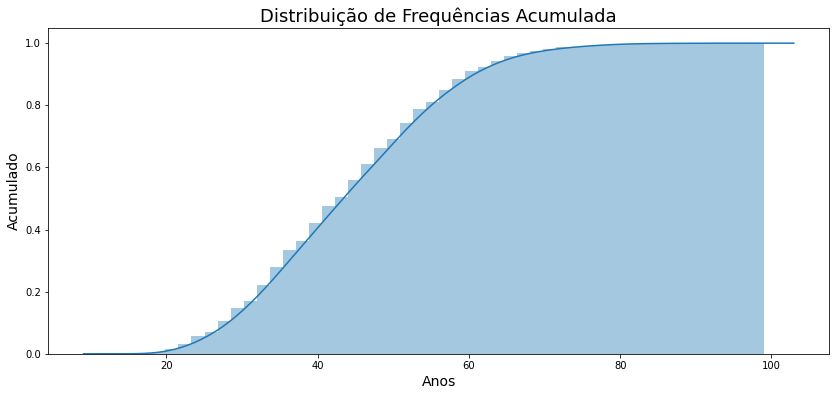

In [ ]:
ax = sns.distplot(df.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

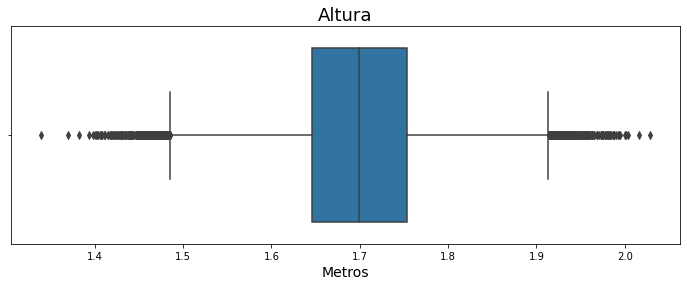

In [ ]:
ax = sns.boxplot( x = 'Altura', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

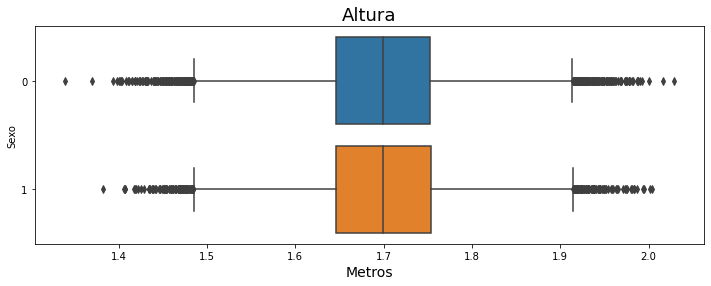

In [ ]:
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

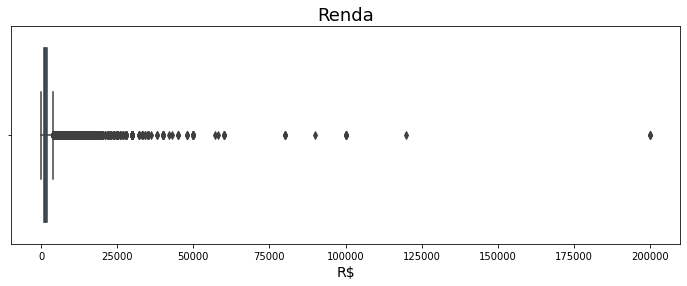

In [ ]:
ax = sns.boxplot( x = 'Renda', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

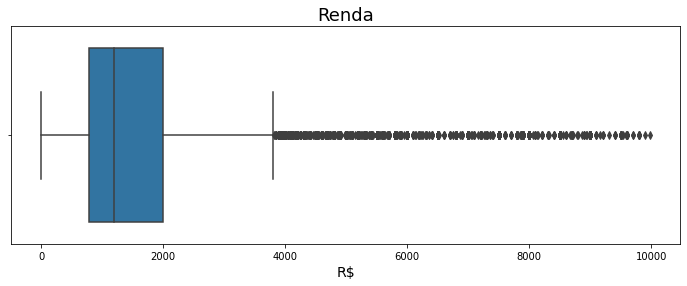

In [ ]:
ax = sns.boxplot( x = 'Renda', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

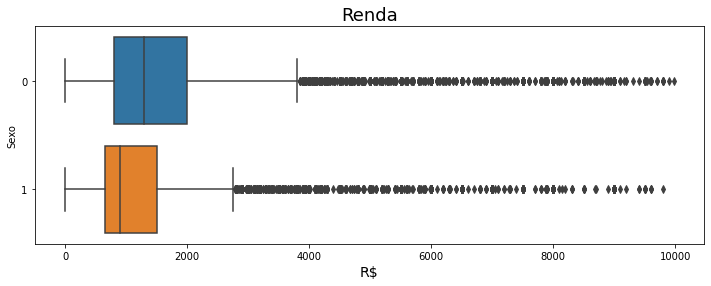

In [ ]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = df.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

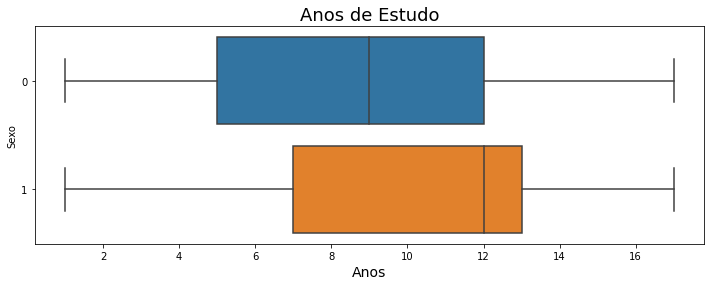

In [ ]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***
Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.
***
**A importância de quantificar a dispersão:**

► O resumo de variável observada apenas por uma medida de posição, ignora a informação sobre a sua variabilidade.

► Não é seguro analisar um conjunto de dados somente pelo emprego de medidas de tendência central.

► Por isso, precisamos de medidas que caracterizem a dispersão ou variabilidade dos dados em relação a um valor central.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [ ]:
df_2.mean()

Matérias
Fulano      7.714286
Beltrano    5.142857
Sicrano     7.714286
dtype: float64

In [ ]:
df_2

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


In [ ]:
df_2.median()

Matérias
Fulano      8.0
Beltrano    3.0
Sicrano     8.0
dtype: float64

In [ ]:
notas_fulano = df_2[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [ ]:
nota_media_fulano = notas_fulano.mean()[0]
nota_media_fulano

7.714285714285714

In [ ]:
notas_fulano['Desvio'] = notas_fulano['Fulano'] - nota_media_fulano
notas_fulano

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Matérias,Fulano,Desvio
Matemática,8,0.285714
Português,10,2.285714
Inglês,4,-3.714286
Geografia,8,0.285714
História,6,-1.714286
Física,10,2.285714
Química,8,0.285714


In [ ]:
notas_fulano['Desvio'].sum()

-8.881784197001252e-16

In [ ]:
notas_fulano['|Desvio|'] = notas_fulano['Desvio'].abs()
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


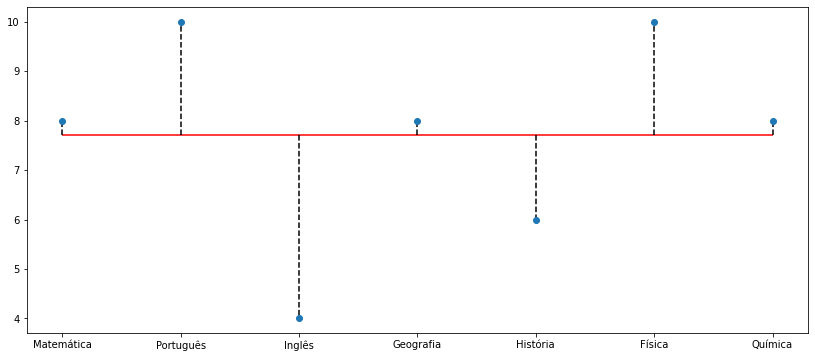

In [ ]:
ax = notas_fulano['Fulano'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_fulano, xmin = 0, xmax = notas_fulano.shape[0] - 1, colors = 'red')
for i in range(notas_fulano.shape[0]):
    ax.vlines(x = i, ymin = nota_media_fulano, ymax = notas_fulano['Fulano'][i], linestyle='dashed')
ax

In [ ]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [ ]:
desvio_medio_absoluto = notas_fulano['Fulano'].mad()
desvio_medio_absoluto

1.5510204081632648

## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [ ]:
notas_fulano['(Desvio)^2'] = notas_fulano['Desvio'].pow(2)
notas_fulano

Matérias,Fulano,Desvio,|Desvio|,(Desvio)^2
Matemática,8,0.285714,0.285714,0.081633
Português,10,2.285714,2.285714,5.224490
Inglês,4,-3.714286,3.714286,13.795918
Geografia,8,0.285714,0.285714,0.081633
História,6,-1.714286,1.714286,2.938776
Física,10,2.285714,2.285714,5.224490
Química,8,0.285714,0.285714,0.081633


In [ ]:
notas_fulano['(Desvio)^2'].sum() / (len(notas_fulano) - 1)

4.57142857142857

In [ ]:
variancia = notas_fulano['Fulano'].var()
variancia

4.57142857142857

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [ ]:
np.sqrt(variancia)

2.1380899352993947

In [ ]:
desvio_padrao = notas_fulano['Fulano'].std()
desvio_padrao

2.1380899352993947

In [ ]:
df_2.std()

Matérias
Fulano      2.138090
Beltrano    4.460141
Sicrano     0.566947
dtype: float64